## Analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Importing our cleansed files & glancing at the data

In [ ]:
df_basics = pd.read_parquet('/basics_final.parquet')

In [ ]:
df_ratings = pd.read_parquet('/ratings_final.parquet')

In [ ]:
df_roles = pd.read_parquet('/roles_final.parquet')

In [ ]:
df_basics.info()

In [ ]:
df_basics.head()

In [ ]:
df_roles.info()

In [ ]:
 df_roles.head()

In [ ]:
df_ratings.info()

In [ ]:
df_ratings.head()

Ratings: High Level Overview

Average ratings across all movies was 6.1, with scores ranging from 1 all the way to 10.

In [ ]:
df_ratings.describe()

,averageRating,numVotes
count,91258.000000,9.125800e+04
mean,6.102273,1.018797e+04
std,1.333375,6.217423e+04
min,1.000000,5.000000e+00
25%,5.300000,5.600000e+01
50%,6.200000,2.680000e+02
75%,7.000000,1.556000e+03
max,10.000000,2.886833e+06


Text(0.5, 1.0, 'Average Rating Frequency Distribution')

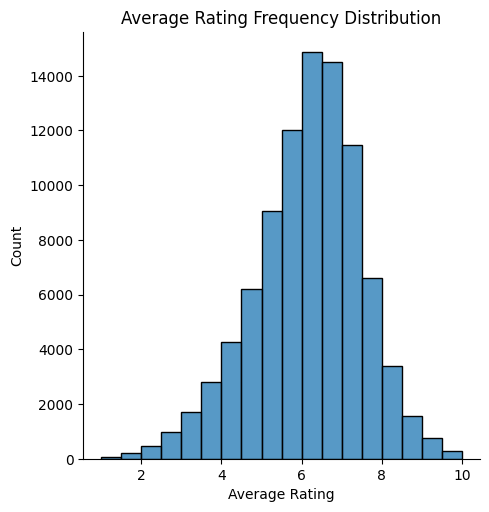

In [ ]:
sns.displot(df_ratings, x="averageRating", bins=18)
plt.xlabel("Average Rating")
plt.title("Average Rating Frequency Distribution")

Ratings by Genre:

In [ ]:
gb_genre = df_basics.merge(df_ratings, on = 'tconst')

In [ ]:
gb_genre.describe()

In [ ]:
gb_genre['genres'].nunique()

901

In [ ]:
gb_genre.loc[:,['genres','averageRating']].groupby('genres').mean().reset_index().sort_values('averageRating', ascending = False)

In [ ]:
df_sorted_genres_counts = gb_genre.loc[:,['genres','averageRating']].groupby('genres').agg(['count','mean']).reset_index().sort_values(('averageRating','count'), ascending = False)

In [ ]:
df_sorted_genres_counts.head()

In [ ]:
df_top10 = df_sorted_genres_counts.head(10)

<Axes: xlabel="('averageRating', 'count')", ylabel='genres'>

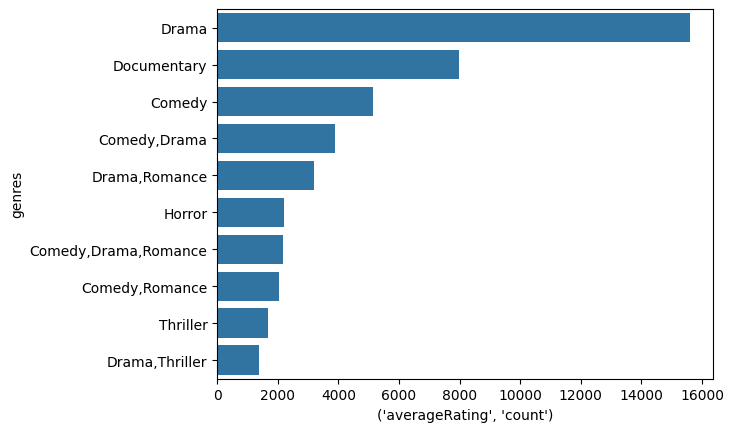

In [ ]:
sns.barplot(df_top10, y = 'genres', x = ('averageRating','count'))

<Axes: xlabel="('averageRating', 'mean')", ylabel='genres'>

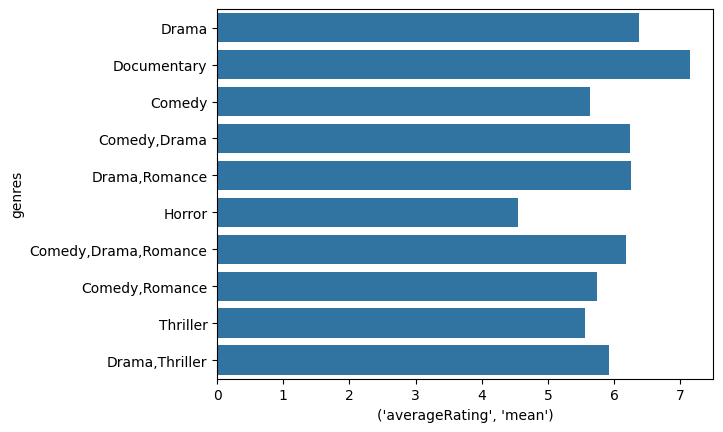

In [ ]:
sns.barplot(df_top10, y = 'genres', x = ('averageRating','mean'))

In [ ]:
df_sorted_genres_means = gb_genre.loc[:,['genres','averageRating']].groupby('genres').agg(['count','mean']).reset_index().sort_values(('averageRating','mean'), ascending = False)

In [ ]:
df_sorted_genres_means.head(10)

genres averageRating      
                                           count  mean
581            Crime,Family,Horror             1  9.60
879                           News             1  9.10
881               Reality-TV,Sport             1  9.00
438              Biography,Romance             1  8.80
666       Documentary,Music,Sci-Fi             1  8.70
669          Documentary,Music,War             2  8.65
887           Romance,Thriller,War             2  8.60
167             Adult,Drama,Sci-Fi             1  8.50
821        History,Horror,Thriller             1  8.30
403  Biography,Documentary,Musical             1  8.30

Ratings by Year:

Text(0, 0.5, 'Average Rating')

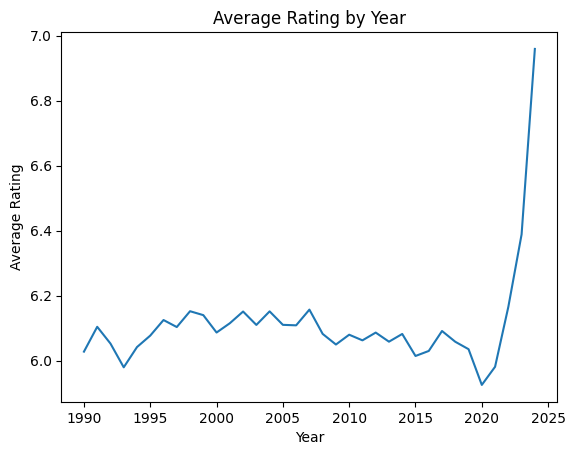

In [ ]:
sns.lineplot(data = gb_genre, x = 'startYear', y = 'averageRating', errorbar = None)
plt.title("Average Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")

##Note the spike in recent years: we think it may be due to movies being "overhyped" when they first come out!

In [ ]:
gb_genre_no24 = gb_genre.loc[gb_genre["startYear"] < 2022]

(5.9, 6.2)

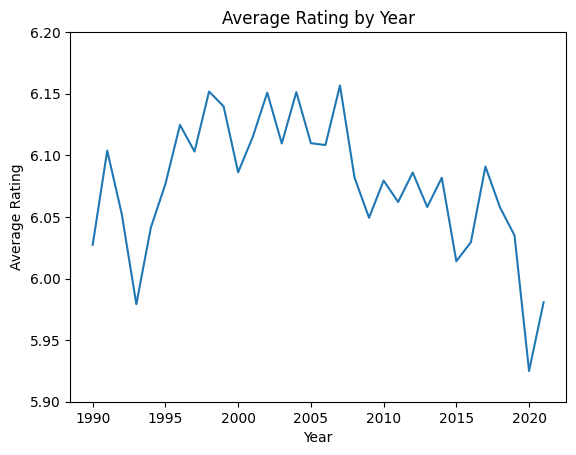

In [ ]:
sns.lineplot(data = gb_genre_no24, x = 'startYear', y = 'averageRating', errorbar = None)
plt.title("Average Rating by Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.ylim(5.9, 6.2)

Ratings by Run Time:

In [ ]:
gb_genre.info()
##see nulls for runtimeminutes; needed to exclude from this portion of analysis

In [ ]:
gb_genre.dropna(subset=['runtimeMinutes'], inplace=True)

In [ ]:
gb_genre.describe()
## see crazy outliers

In [ ]:
gb_genre['runtimeMinutes'].quantile(0.01)

52.0

In [ ]:
gb_genre['runtimeMinutes'].quantile(0.99)

169.0

In [ ]:
gb_genre_rt = gb_genre.loc[(gb_genre["runtimeMinutes"] < gb_genre['runtimeMinutes'].quantile(0.99)) & (gb_genre["runtimeMinutes"] > gb_genre['runtimeMinutes'].quantile(0.01))]
## excludes the outliers

In [ ]:
gb_genre_rt.describe()

Text(0, 0.5, 'Average Rating')

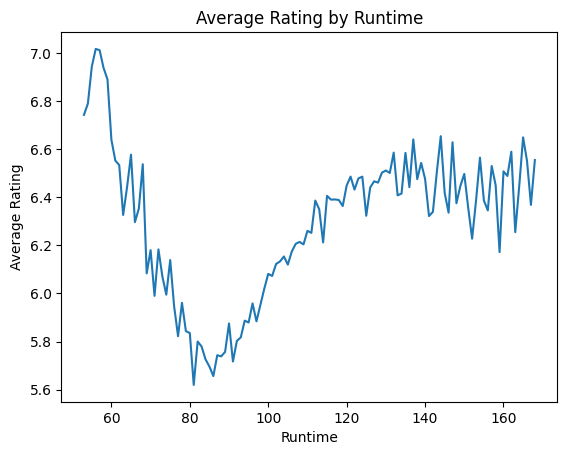

In [ ]:
sns.lineplot(data = gb_genre_rt, x = 'runtimeMinutes', y = 'averageRating', errorbar=None)
plt.title("Average Rating by Runtime")
plt.xlabel("Runtime")
plt.ylabel("Average Rating")

In [ ]:
gb_genre_rt['runtime_bins'] = pd.cut(gb_genre_rt['runtimeMinutes'], 24)
##considered trying to split runtime into bins to help clear up the data further, but hit a road block

<ipython-input-97-0cce02ba04df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gb_genre_rt['runtime_bins'] = pd.cut(gb_genre_rt['runtimeMinutes'], 24)


Ratings by Directors:

In [ ]:
df_roles.head()

,tconst,nconst,category,primaryName
0,tt0013274,nm0412842,director,Nikolai Izvolov
1,tt0105618,nm0412842,actor,Nikolai Izvolov
2,tt1478330,nm0412842,self,Nikolai Izvolov
3,tt0013274,nm0895048,director,Dziga Vertov
4,tt0013274,nm13054604,producer,Konstantin Grinberg


In [ ]:
df_directors = df_roles.loc[df_roles['category'] == 'director']
## wanted directors only

In [ ]:
df_directors.head()

,tconst,nconst,category,primaryName
0,tt0013274,nm0412842,director,Nikolai Izvolov
3,tt0013274,nm0895048,director,Dziga Vertov
7,tt0015414,nm0615736,director,Musidora
39,tt19890316,nm0000212,director,Meg Ryan
43,tt3501590,nm0000212,director,Meg Ryan


In [ ]:
df_directors['nconst'].nunique()

53151

In [ ]:
df_crew = pd.read_csv('https://datasets.imdbws.com/title.crew.tsv.gz', sep = '\t', usecols = ['tconst','directors'], na_values = ['\\N'])

In [ ]:
gb_direct = df_basics.merge(df_crew, on = 'tconst')

In [ ]:
gb_direct = gb_direct.merge(df_ratings, on = 'tconst')

In [ ]:
gb_direct.head(20)

In [ ]:
df_sorted_directors_counts = gb_direct.loc[:,['directors','averageRating']].groupby('directors').agg(['count','mean']).reset_index().sort_values(('averageRating','count'), ascending = False)

In [ ]:
df_sorted_directors_counts.head(20)

In [ ]:
df_vet_directors = df_sorted_directors_counts.loc[df_sorted_directors_counts[('averageRating','count')] > 10].sort_values(('averageRating','mean'), ascending = False)
##looking for experienced directors by using number of movies directed > 10

In [ ]:
df_top5 = df_vet_directors.head()

In [ ]:
df_top5.head()

In [ ]:
df_sorted_directors_means = gb_direct.loc[:,['directors','averageRating']].groupby('directors').agg(['count','mean']).reset_index().sort_values(('averageRating','mean'), ascending = False)

In [ ]:
df_sorted_directors_means.head(15)

In [ ]:
df1 = df_directors.loc[df_directors['nconst'].isin(df_top5['directors'])].drop_duplicates()

In [ ]:
df_names_2 = df1.drop(columns = ['tconst'])

In [ ]:
df_names_2 =df_names_2.drop_duplicates()

In [ ]:
df_names_2.sort_values('nconst')

,nconst,category,primaryName
185109,nm0000233,director,Quentin Tarantino
159909,nm0001392,director,Peter Jackson
386215,nm0634240,director,Christopher Nolan
876501,nm5592581,director,Rajiv Chilaka
1095314,nm6157331,director,Rui Constantino


In [ ]:
df_top5.sort_values('directors')

directors averageRating          
                         count      mean
65     nm0000233            11  8.081818
338    nm0001392            13  7.892308
10760  nm0634240            12  8.166667
43442  nm5592581            22  7.872727
44780  nm6157331            17  8.011765

In [ ]:
df_names_2['avg rating'] = df_top5[('averageRating','count')]
##tried to add the mean column with no success